<a href="https://colab.research.google.com/github/Gautham157/OIBSIP_datascience_task2/blob/main/Unemployment_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv("Unemployment in India.csv.txt", sep='\t', encoding='utf-16')


In [71]:
df.columns = df.columns.str.strip()
df.rename(columns={'Estimated Unemployment Rate (%)': 'Unemployment Rate'}, inplace=True)

In [72]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [73]:
df_grouped = df.groupby('Date')['Unemployment Rate'].mean().reset_index()


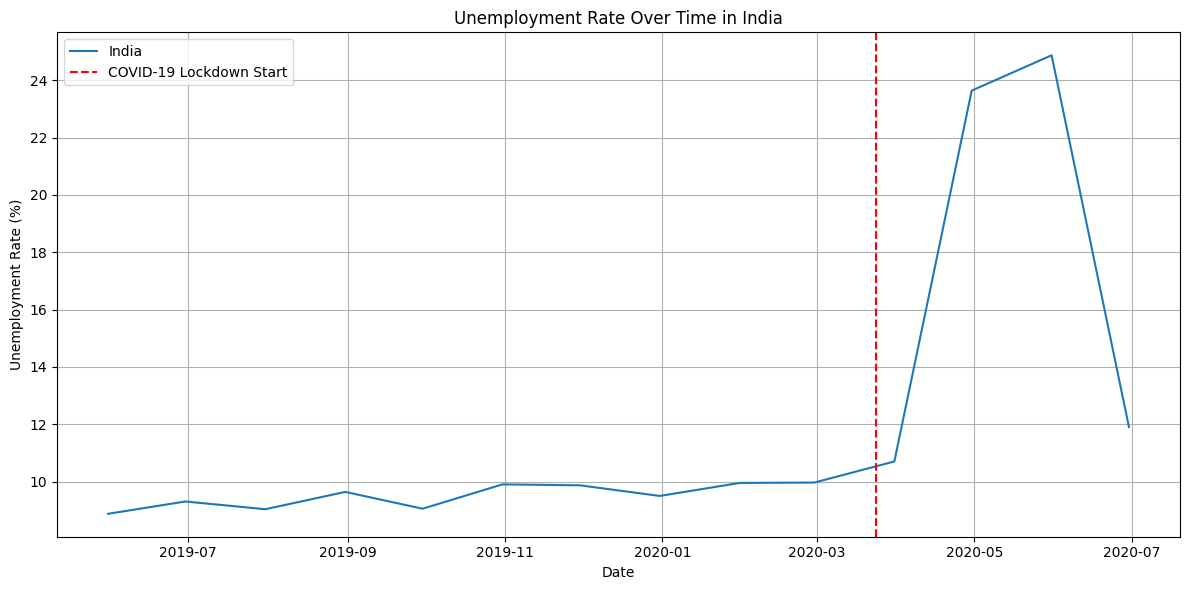

In [74]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='Date', y='Unemployment Rate', label='India')
plt.axvline(pd.to_datetime('2020-03-24'), color='red', linestyle='--', label='COVID-19 Lockdown Start')
plt.title('Unemployment Rate Over Time in India')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [75]:
before_covid = df[df['Date'] < '2020-03-01']
after_covid = df[df['Date'] >= '2020-03-01']
print("Average Unemployment Rate BEFORE COVID:", round(before_covid['Unemployment Rate'].mean(), 2))
print("Average Unemployment Rate AFTER COVID :", round(after_covid['Unemployment Rate'].mean(), 2))

Average Unemployment Rate BEFORE COVID: 9.51
Average Unemployment Rate AFTER COVID : 17.77


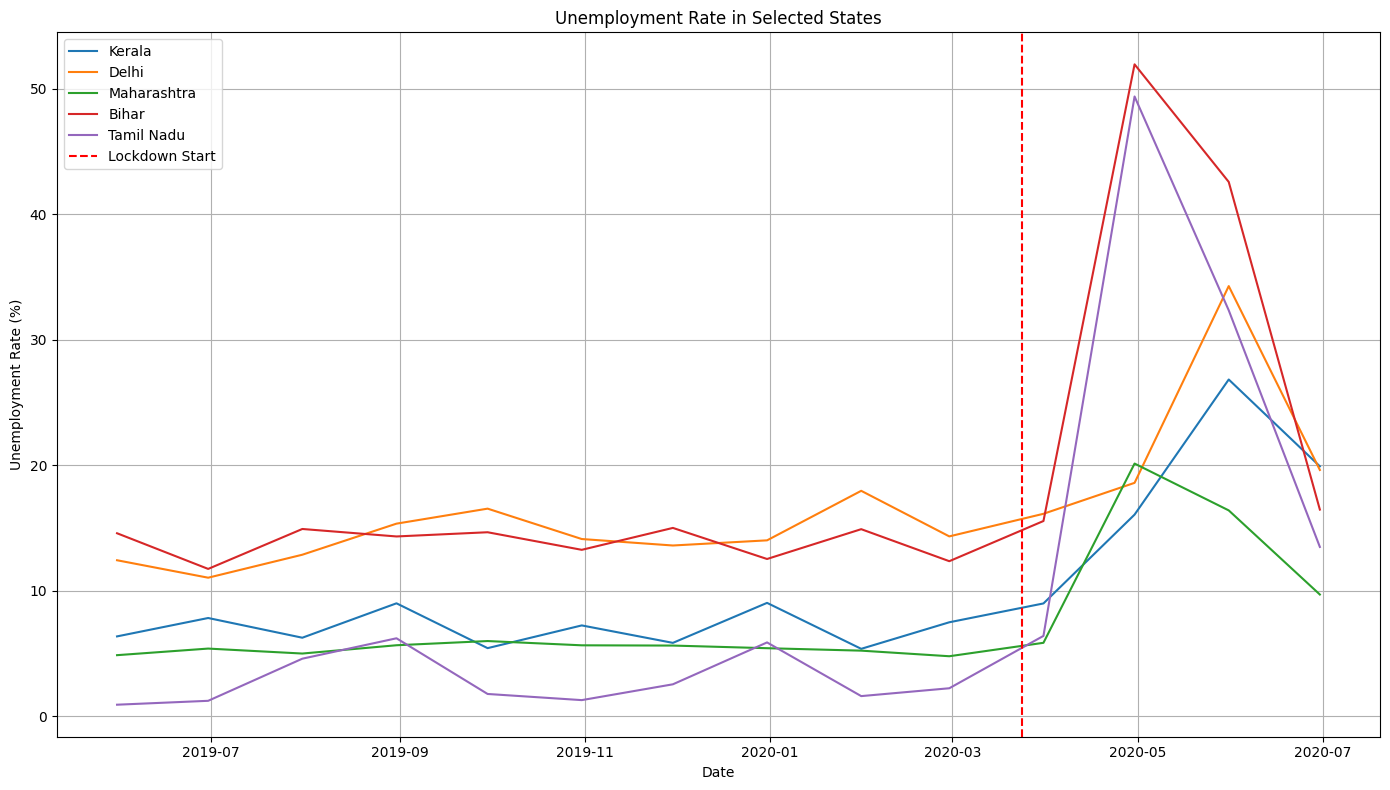

In [76]:
# Group by Region and Date
region_grouped = df.groupby(['Region', 'Date'])['Unemployment Rate'].mean().reset_index()

# Choose regions to plot
regions = ['Kerala', 'Delhi', 'Maharashtra', 'Bihar', 'Tamil Nadu']

# Plot
plt.figure(figsize=(14, 8))
for region in regions:
    data = region_grouped[region_grouped['Region'] == region]
    sns.lineplot(data=data, x='Date', y='Unemployment Rate', label=region)

plt.axvline(pd.to_datetime('2020-03-24'), color='red', linestyle='--', label='Lockdown Start')
plt.title('Unemployment Rate in Selected States')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
